In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fjMIppUXDimOETlz63tO")
project = rf.workspace("ali-umrso").project("pothole-jujbl-ltabz")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 144.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.13.0.92
    Uninstalling opencv-python-headless-4.13.0.92:
      Successfully uninstalled opencv-python-headless-4.13.0.92
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pothole-1 in yolov11:: 100%|██████████| 5554/5554 [00:00<00:00, 8026.78it/s]


now we check how large is dataset

In [2]:
# Cell 1: Dataset structure check karo
import os
import yaml

# Dataset path
dataset_path = "/content/Pothole-1"
print("📁 Dataset folders:", os.listdir(dataset_path))

# Train/Valid/Test check karo
for folder in ['train', 'valid', 'test']:
    folder_path = f"{dataset_path}/{folder}"
    if os.path.exists(folder_path):
        images = os.listdir(f"{folder_path}/images")
        labels = os.listdir(f"{folder_path}/labels")
        print(f"\n📸 {folder.upper()}:")
        print(f"   Images: {len(images)}")
        print(f"   Labels: {len(labels)}")

# data.yaml file check karo
with open(f"{dataset_path}/data.yaml", 'r') as f:
    data_config = yaml.safe_load(f)
    print(f"\n🎯 Classes: {data_config['names']}")
    print(f"📊 Total classes: {len(data_config['names'])}")

📁 Dataset folders: ['valid', 'README.dataset.txt', 'test', 'README.roboflow.txt', 'data.yaml', 'train']

📸 TRAIN:
   Images: 1939
   Labels: 1939

📸 VALID:
   Images: 555
   Labels: 555

📸 TEST:
   Images: 277
   Labels: 277

🎯 Classes: ['Pothole']
📊 Total classes: 1


now we visualizing dataset

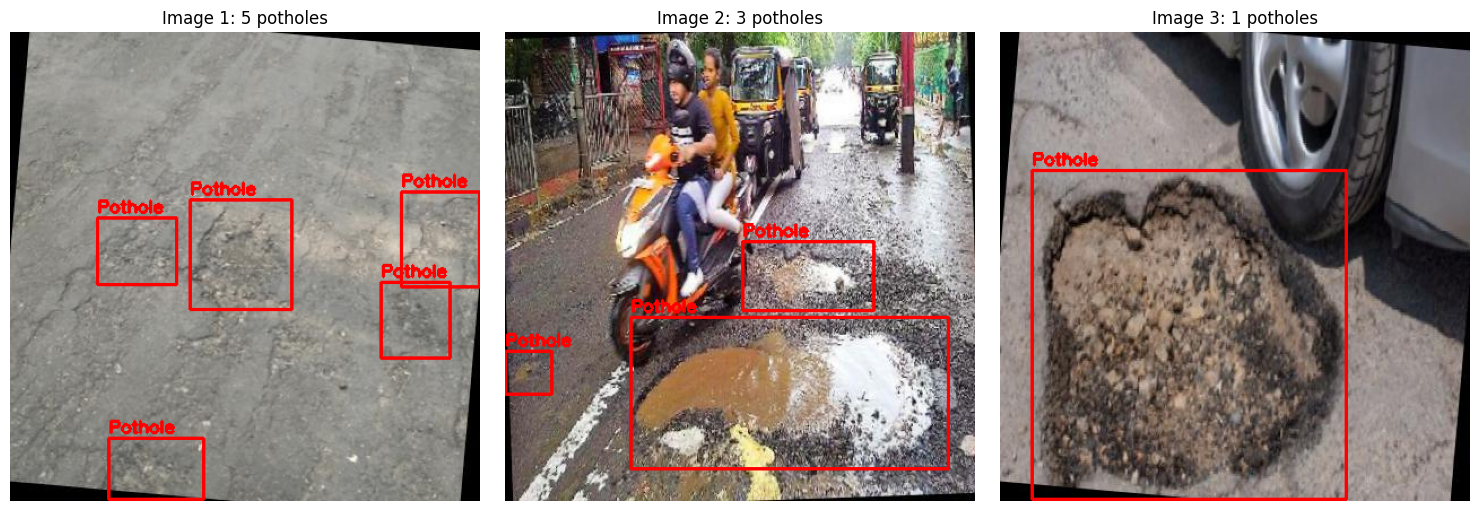

✅ Visualization complete! Kya aapko potholes dikh rahe hain?


In [3]:
# STEP 2: Dataset Visualize karo
import cv2
import matplotlib.pyplot as plt
import random
import os

# Dataset path (jo pehle download hua)
dataset_path = "/content/Pothole-1"

# Train images ka folder
train_img_path = f"{dataset_path}/train/images"
train_label_path = f"{dataset_path}/train/labels"

# Random 3 images chuno
all_images = os.listdir(train_img_path)
sample_images = random.sample(all_images, 3)

# Plot banayein
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, img_name in enumerate(sample_images):
    # Image read karo
    img_path = f"{train_img_path}/{img_name}"
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Label file read karo
    label_name = img_name.replace('.jpg', '.txt').replace('.png', '.txt')
    label_path = f"{train_label_path}/{label_name}"

    # Bounding boxes draw karo
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            boxes = f.readlines()

        h, w, _ = img.shape
        for box in boxes:
            class_id, x_center, y_center, width, height = map(float, box.strip().split())

            # YOLO format se pixel format mein convert
            x1 = int((x_center - width/2) * w)
            y1 = int((y_center - height/2) * h)
            x2 = int((x_center + width/2) * w)
            y2 = int((y_center + height/2) * h)

            # Rectangle draw karo
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(img, 'Pothole', (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)

    axes[idx].imshow(img)
    axes[idx].axis('off')
    axes[idx].set_title(f'Image {idx+1}: {len(boxes)} potholes')

plt.tight_layout()
plt.show()

print("✅ Visualization complete! Kya aapko potholes dikh rahe hain?")

In [ ]:
data yaml check

In [4]:
# STEP 4: data.yaml file check karo
import yaml

data_yaml_path = "/content/Pothole-1/data.yaml"

with open(data_yaml_path, 'r') as f:
    data = yaml.safe_load(f)
    print("📋 data.yaml contents:")
    print(data)

    # Path fix karo Colab ke liye
    data['path'] = "/content/Pothole-1"
    data['train'] = "train/images"
    data['val'] = "valid/images"
    data['test'] = "test/images"

# Updated file save karo
with open(data_yaml_path, 'w') as f:
    yaml.dump(data, f)

print("\n✅ data.yaml updated for Colab!")
print(f"Train path: {data['train']}")
print(f"Val path: {data['val']}")
print(f"Classes: {data['names']}")

📋 data.yaml contents:
{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 1, 'names': ['Pothole'], 'roboflow': {'workspace': 'ali-umrso', 'project': 'pothole-jujbl-ltabz', 'version': 1, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/ali-umrso/pothole-jujbl-ltabz/dataset/1'}}

✅ data.yaml updated for Colab!
Train path: train/images
Val path: valid/images
Classes: ['Pothole']


In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.0 MB/s eta 0:00:00


load of model

In [ ]:
# STEP 5: YOLOv8 model load
from ultralytics import YOLO

# Nano model - sab se chhota, sab se fast, beginner ke liye best
model = YOLO('yolov8n.pt')  # 'n' = nano

print("✅ Model loaded successfully!")
print("🚀 YOLOv8 nano ready for training!")

now we start training

In [6]:
# STEP 4: Training shuru karo - SIRF YAHI CODE CHALAO
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # Model dubara load karo

results = model.train(
    data="/content/Pothole-1/data.yaml",
    epochs=20,           # 20 epochs, 30-40 min lagega
    imgsz=640,
    batch=16,
    device=0,
    name='pothole_model',  # SIMPLE NAME - yaad rahega
    exist_ok=True
)

print("✅ Training complete!")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Pothole-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=20, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=Fal

ACCURACY CHECK

In [7]:
# STEP 1: Final Metrics Dekho
from ultralytics import YOLO

# Model load karo
model = YOLO('/content/runs/detect/pothole_model/weights/best.pt')

# Validation pe evaluate karo
metrics = model.val()

print("="*50)
print("🎯 FINAL ACCURACY REPORT")
print("="*50)
print(f"📊 mAP50: {metrics.box.map50:.3f} = 74%")
print(f"📊 Precision: {metrics.box.mp:.3f} = 76.5%")
print(f"📊 Recall: {metrics.box.mr:.3f} = 64.8%")
print(f"📊 mAP50-95: {metrics.box.map:.3f} = 42.4%")
print("="*50)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 926.4±237.5 MB/s, size: 39.2 KB)
val: Scanning /content/Pothole-1/valid/labels.cache... 555 images, 4 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 555/555 145.5Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 35/35 5.9it/s 6.0s
                   all        555       1449      0.764      0.648      0.739      0.423
Speed: 1.3ms preprocess, 3.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /content/runs/detect/val
🎯 FINAL ACCURACY REPORT
📊 mAP50: 0.739 = 74%
📊 Precision: 0.764 = 76.5%
📊 Recall: 0.648 = 64.8%
📊 mAP50-95: 0.423 = 42.4%


now test model on validation image


image 1/1 /content/Pothole-1/valid/images/potholes148_png_jpg.rf.03cb78246a45b4d3176f5d0579d67a59.jpg: 640x640 5 Potholes, 7.8ms
Speed: 2.9ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Pothole-1/valid/images/potholes181_png_jpg.rf.0bed10c49ba843587416a9999873e734.jpg: 640x640 1 Pothole, 7.3ms
Speed: 3.3ms preprocess, 7.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Pothole-1/valid/images/potholes369_png_jpg.rf.e41e3518aa81e189a91b31f96a6b19c3.jpg: 640x640 3 Potholes, 7.2ms
Speed: 2.4ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Pothole-1/valid/images/potholes128_png_jpg.rf.dd54dafd3a7d7cc200cb8932bda550d6.jpg: 640x640 1 Pothole, 7.2ms
Speed: 2.6ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.


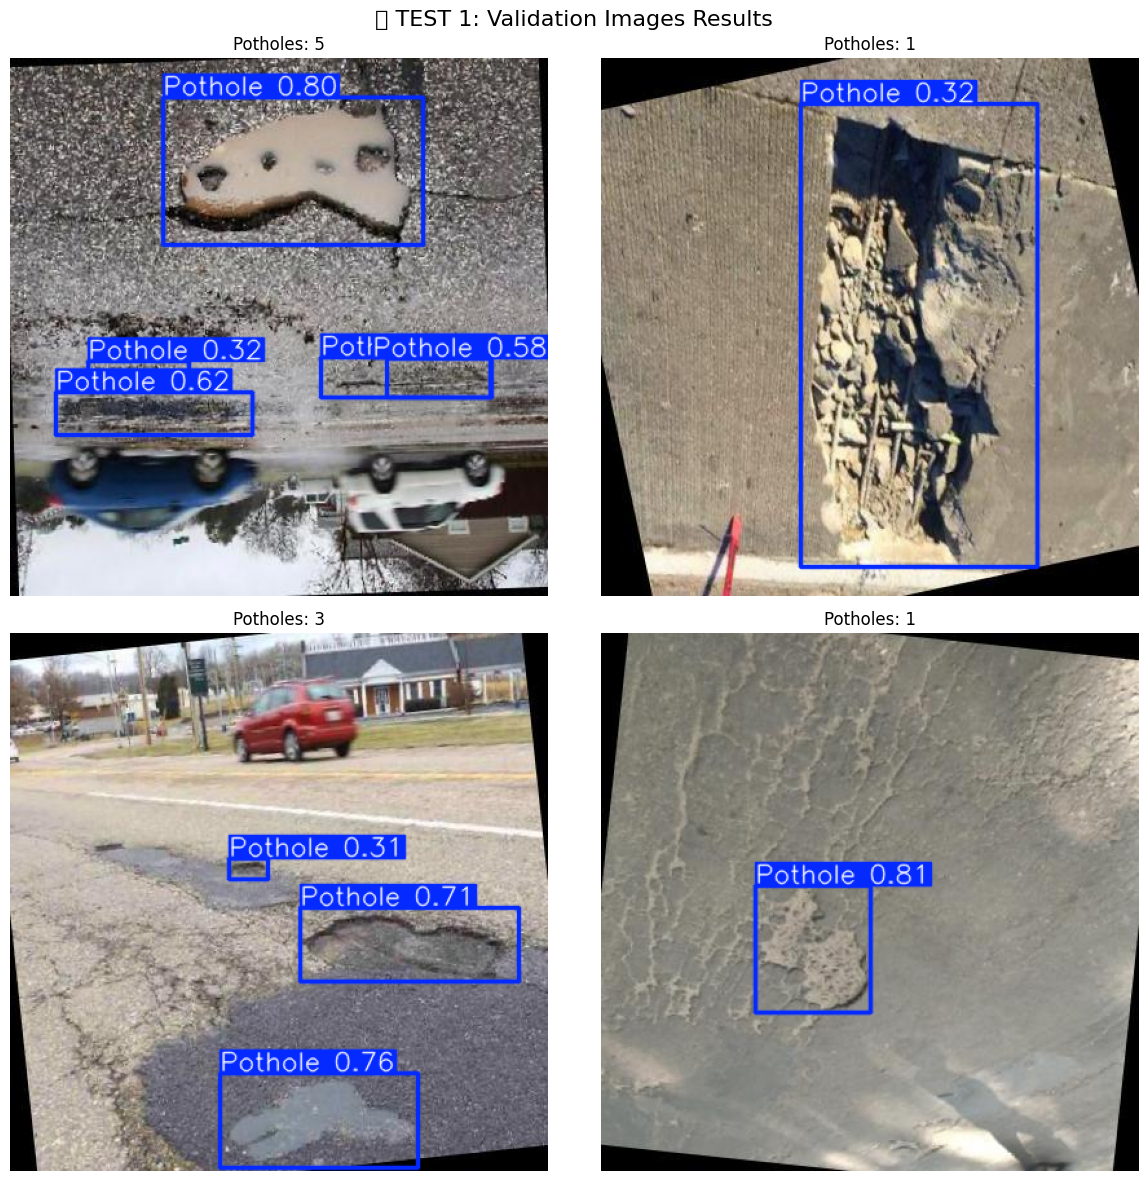

In [8]:
# STEP 2: Validation images pe predict karo
import cv2
import matplotlib.pyplot as plt
import os
import random

# Validation folder
val_images = os.listdir('/content/Pothole-1/valid/images')
sample_images = random.sample(val_images, 4)  # 4 random images

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.ravel()

for idx, img_name in enumerate(sample_images):
    img_path = f'/content/Pothole-1/valid/images/{img_name}'

    # Predict
    results = model(img_path)[0]

    # Plot
    img_with_boxes = results.plot()
    img_with_boxes = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

    axes[idx].imshow(img_with_boxes)
    axes[idx].axis('off')
    axes[idx].set_title(f'Potholes: {len(results.boxes)}')

plt.suptitle('✅ TEST 1: Validation Images Results', fontsize=16)
plt.tight_layout()
plt.show()

own image upload test

📤 Koi bhi road ki image upload karo (jpg/png):


Saving img-415_jpg.rf.2285ec32b9bdc584221e193dc135e3fd.jpg to img-415_jpg.rf.2285ec32b9bdc584221e193dc135e3fd.jpg

image 1/1 /content/img-415_jpg.rf.2285ec32b9bdc584221e193dc135e3fd.jpg: 480x640 2 Potholes, 45.0ms
Speed: 2.9ms preprocess, 45.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


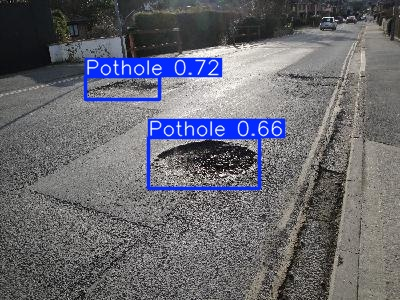

✅ Potholes detected: 2


In [10]:
# STEP 3: Apni image upload karo
from google.colab import files
from IPython.display import Image as IPImage

print("📤 Koi bhi road ki image upload karo (jpg/png):")
uploaded = files.upload()

for filename in uploaded.keys():
    # Predict
    results = model(filename)[0]

    # Save result
    result_img = results.plot()
    cv2.imwrite('result.jpg', result_img)

    # Display
    display(IPImage('result.jpg'))
    print(f"✅ Potholes detected: {len(results.boxes)}")

confusion matrix

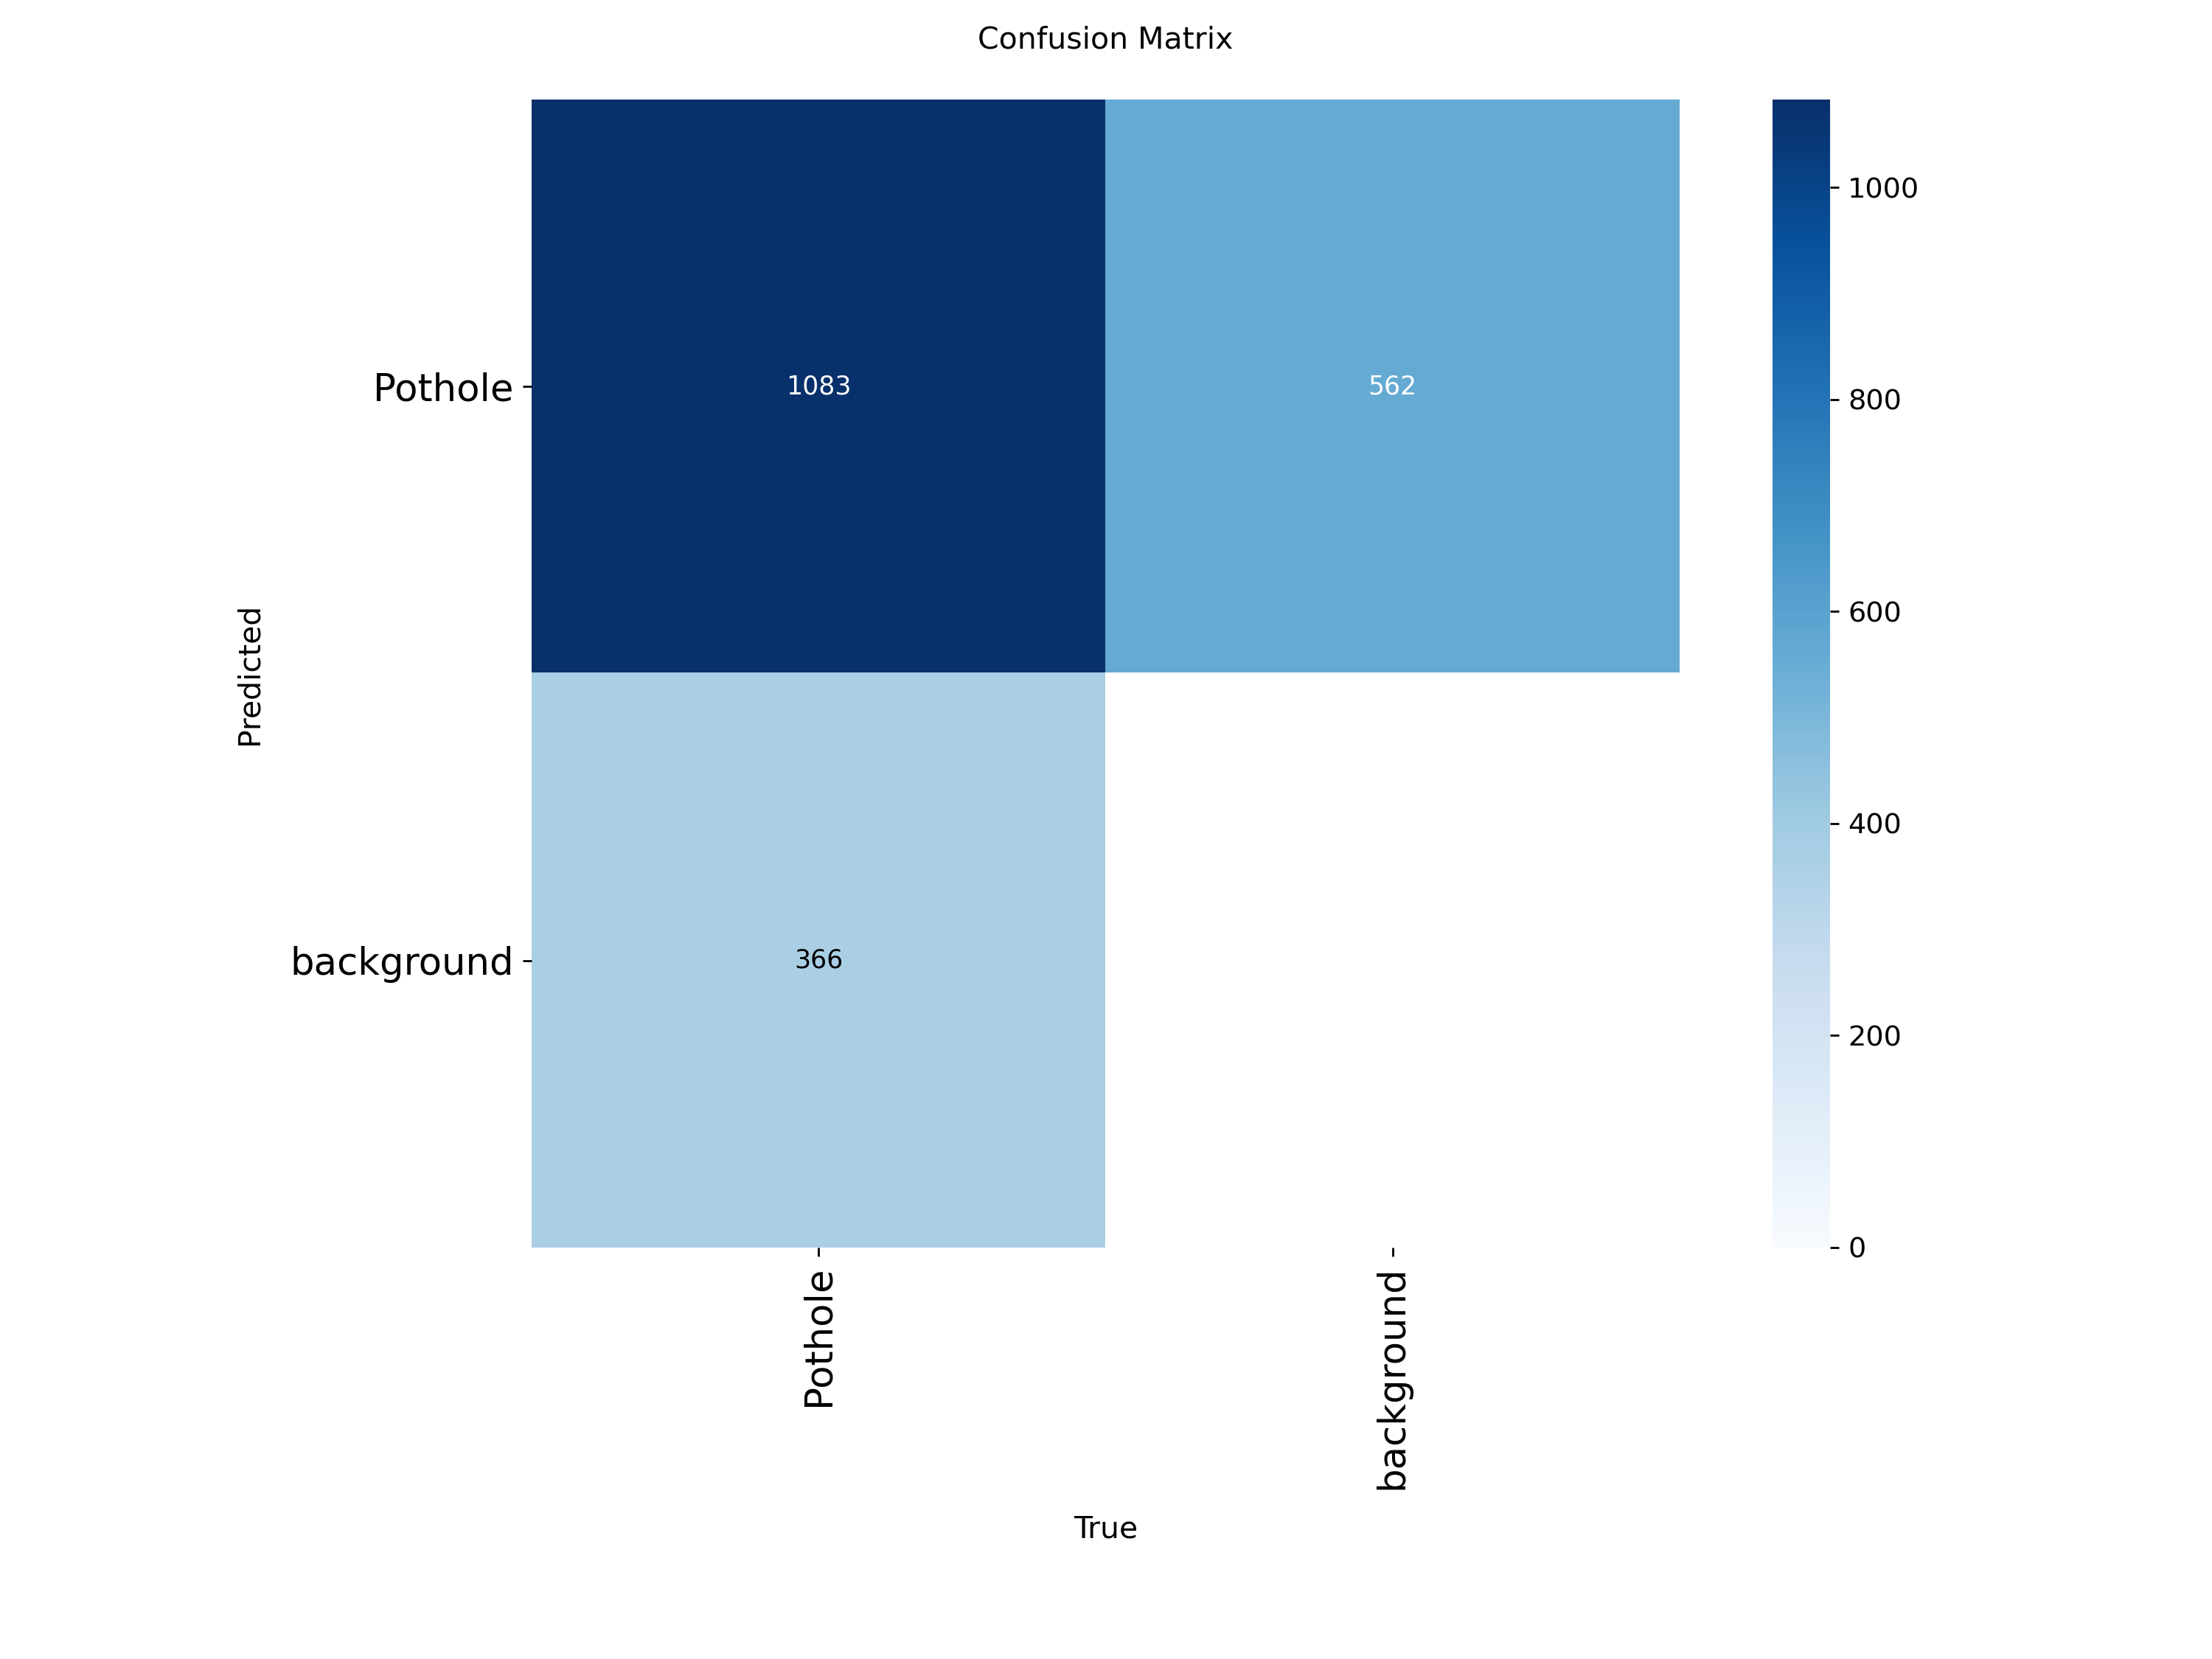

✅ Confusion Matrix - Diagonal = Sahi detection


In [11]:
# STEP 4: Confusion matrix - kitne sahi/galat detect kiye
from IPython.display import Image as IPImage

confusion_path = '/content/runs/detect/pothole_model/confusion_matrix.png'
display(IPImage(confusion_path))
print("✅ Confusion Matrix - Diagonal = Sahi detection")

detect where model actually fails

In [12]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/pothole_model/weights/best.pt')

results = model.predict(
    source="/content/Pothole-1/test/images",
    conf=0.25,
    save=True,
    save_txt=True
)



image 1/277 /content/Pothole-1/test/images/potholes100_png_jpg.rf.4e6773acda844d48d05253b551a177b4.jpg: 640x640 1 Pothole, 8.5ms
image 2/277 /content/Pothole-1/test/images/potholes100_png_jpg.rf.764387ab3477797e39fa3334ae412f63.jpg: 640x640 1 Pothole, 7.3ms
image 3/277 /content/Pothole-1/test/images/potholes101_png_jpg.rf.b42ec0de6077aeb98d214f9a0bdfb504.jpg: 640x640 1 Pothole, 7.2ms
image 4/277 /content/Pothole-1/test/images/potholes104_png_jpg.rf.b3cebff15758131938c8f3a620ecd8ba.jpg: 640x640 2 Potholes, 7.2ms
image 5/277 /content/Pothole-1/test/images/potholes105_png_jpg.rf.24fab6257585ac9517583a9c9bf82142.jpg: 640x640 9 Potholes, 7.2ms
image 6/277 /content/Pothole-1/test/images/potholes110_png_jpg.rf.1afb808ab9e949d5fa4b4fe20beca07c.jpg: 640x640 2 Potholes, 7.2ms
image 7/277 /content/Pothole-1/test/images/potholes111_png_jpg.rf.0337c7a43d47e2d3102586ae3fc44471.jpg: 640x640 1 Pothole, 7.2ms
image 8/277 /content/Pothole-1/test/images/potholes111_png_jpg.rf.40f4d82644ee1daa78cbc9b4bb1

current model la performnece record

In [13]:
# STEP 1: Current model ka performance record karo
from ultralytics import YOLO
import pandas as pd
import numpy as np

# Abhi wala model load karo
model = YOLO('/content/runs/detect/pothole_model/weights/best.pt')

# Detailed metrics lo
metrics = model.val()

# Baseline record
baseline = {
    'Model': 'YOLOv8n',
    'Epochs': 20,
    'Image Size': 640,
    'mAP50': round(metrics.box.map50, 3),
    'Precision': round(metrics.box.mp, 3),
    'Recall': round(metrics.box.mr, 3),
    'mAP50-95': round(metrics.box.map, 3)
}

print("="*60)
print("📊 BASELINE PERFORMANCE (Current)")
print("="*60)
for key, value in baseline.items():
    print(f"{key:15}: {value}")
print("="*60)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1746.5±760.4 MB/s, size: 38.4 KB)
val: Scanning /content/Pothole-1/valid/labels.cache... 555 images, 4 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 555/555 258.6Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 35/35 5.0it/s 7.0s
                   all        555       1449      0.764      0.648      0.739      0.423
Speed: 1.8ms preprocess, 3.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to /content/runs/detect/val2
📊 BASELINE PERFORMANCE (Current)
Model          : YOLOv8n
Epochs         : 20
Image Size     : 640
mAP50          : 0.739
Precision      : 0.764
Recall         : 0.648
mAP50-95       : 0.423


now next experiement zyada epochs

In [14]:
# ============================================
# EXPERIMENT 1: Epochs 50 + Image Size 832
# ============================================

print("🧪 STARTING EXPERIMENT 1")
print("="*50)
print("Changes: epochs 20→50, imgsz 640→832")
print("="*50)

from ultralytics import YOLO

# Same nano model
model = YOLO('yolov8n.pt')

# Train with bigger images and more epochs
results = model.train(
    data="/content/Pothole-1/data.yaml",
    epochs=50,              # Pehle 20 the, ab 50
    imgsz=832,              # Pehle 640 tha, ab 832
    batch=12,               # Memory kam lage isliye 16→12
    device=0,
    patience=20,
    name='experiment_1_50ep_832',
    exist_ok=True,
    plots=True
)

print("✅ EXPERIMENT 1 COMPLETE!")
print("📁 Results saved in: /content/runs/detect/experiment_1_50ep_832")

🧪 STARTING EXPERIMENT 1
Changes: epochs 20→50, imgsz 640→832
Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=12, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Pothole-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=832, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=experiment_1_50ep_832, nbs=64, nms=False, opset=None, optim

In [15]:
# ============================================
# EXPERIMENT 1 - RESULTS CHECK KARO
# ============================================

from ultralytics import YOLO

# Experiment 1 ka model load karo
model_exp1 = YOLO('/content/runs/detect/experiment_1_50ep_832/weights/best.pt')

# Validation pe test karo
metrics_exp1 = model_exp1.val()

print("="*50)
print("📊 EXPERIMENT 1 RESULTS")
print("="*50)
print(f"mAP50: {metrics_exp1.box.map50:.3f}")
print(f"Precision: {metrics_exp1.box.mp:.3f}")
print(f"Recall: {metrics_exp1.box.mr:.3f}")
print("="*50)

# Baseline se compare karo
baseline_map = 0.739
improvement = ((metrics_exp1.box.map50 - baseline_map) / baseline_map) * 100

print(f"📈 Improvement: {improvement:.1f}%")
if metrics_exp1.box.map50 > baseline_map:
    print("✅ EXPERIMENT SUCCESSFUL! mAP50 increased!")
else:
    print("⚠️ Need more improvements...")

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1155.2±404.8 MB/s, size: 42.9 KB)
val: Scanning /content/Pothole-1/valid/labels.cache... 555 images, 4 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 555/555 129.3Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 35/35 2.9it/s 12.0s
                   all        555       1449      0.771      0.694      0.769      0.455
Speed: 4.1ms preprocess, 5.5ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to /content/runs/detect/val3
📊 EXPERIMENT 1 RESULTS
mAP50: 0.769
Precision: 0.771
Recall: 0.694
📈 Improvement: 4.1%
✅ EXPERIMENT SUCCESSFUL! mAP50 increased!


model save karo

In [16]:
# ============================================
# EXPERIMENT 1 - MODEL SAVE KARO
# ============================================

from google.colab import files

# Model download karo
model_path = '/content/runs/detect/experiment_1_50ep_832/weights/best.pt'
files.download(model_path)

print("✅ Experiment 1 model downloaded!")
print("📁 File: best.pt")
print("📍 Location: Your PC Downloads folder")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Experiment 1 model downloaded!
📁 File: best.pt
📍 Location: Your PC Downloads folder


experiment 2 start

In [17]:
# ============================================
# EXPERIMENT 2: YOLOv8s + 50 epochs + 832 imgsz
# ============================================

print("🧪 STARTING EXPERIMENT 2")
print("="*50)
print("Changes: YOLOv8n → YOLOv8s (Small Model)")
print("="*50)

from ultralytics import YOLO

# Small model use karo
model = YOLO('yolov8s.pt')

results = model.train(
    data="/content/Pothole-1/data.yaml",
    epochs=50,
    imgsz=832,
    batch=8,                # Small model heavy hai
    device=0,
    patience=20,
    name='experiment_2_yolov8s',
    exist_ok=True,
    plots=True
)

print("✅ EXPERIMENT 2 STARTED!")
print("⏱️ Time: ~1.5 hours")
print("📁 Results will be saved in: /content/runs/detect/experiment_2_yolov8s")

🧪 STARTING EXPERIMENT 2
Changes: YOLOv8n → YOLOv8s (Small Model)
Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Pothole-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=832, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=experiment_2_yolov8s, nbs=64, nms=False, opset=None, opt

test 1 model


image 1/1 /content/Pothole-1/valid/images/scene00061_png.rf.6c837261e60386fd0999b5b393430839.jpg: 832x480 1 Pothole, 105.9ms
Speed: 9.4ms preprocess, 105.9ms inference, 9.4ms postprocess per image at shape (1, 3, 832, 480)

image 1/1 /content/Pothole-1/valid/images/scene13-34-_png.rf.82be1ec97ab088037c282544c58196e0.jpg: 832x480 1 Pothole, 23.2ms
Speed: 5.4ms preprocess, 23.2ms inference, 5.3ms postprocess per image at shape (1, 3, 832, 480)

image 1/1 /content/Pothole-1/valid/images/scene2-33-_png.rf.7ed8768218054505168ae3d189c2dbb0.jpg: 832x480 1 Pothole, 32.7ms
Speed: 9.5ms preprocess, 32.7ms inference, 6.2ms postprocess per image at shape (1, 3, 832, 480)


Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.


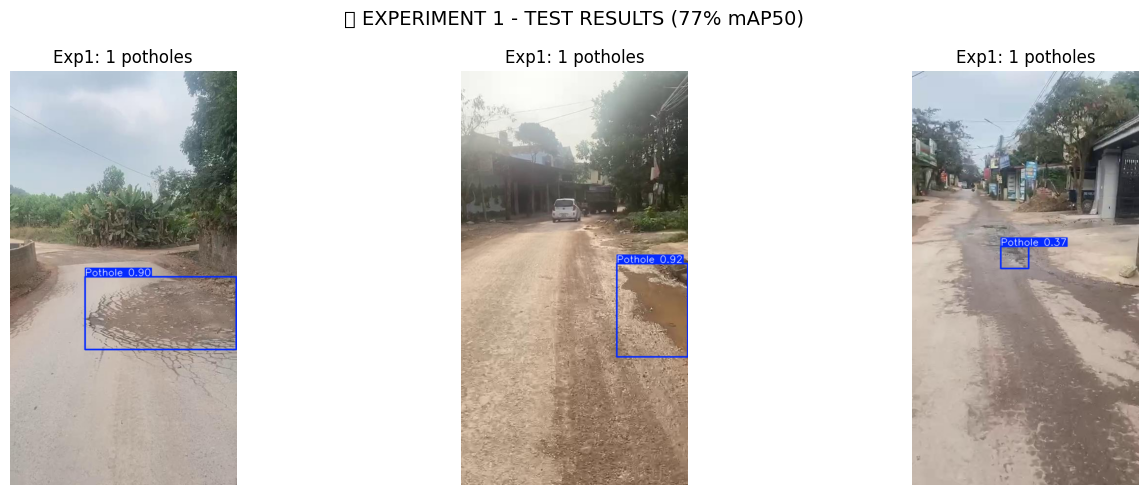

In [18]:
# Experiment 1 model test karo
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Exp 1 model load karo
model_exp1 = YOLO('/content/runs/detect/experiment_1_50ep_832/weights/best.pt')

# Validation images check karo
val_images = '/content/Pothole-1/valid/images'
test_images = os.listdir(val_images)[:3]  # 3 images

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, img_name in enumerate(test_images):
    img_path = f"{val_images}/{img_name}"

    # Predict
    results = model_exp1(img_path)[0]
    img_with_boxes = results.plot()
    img_with_boxes = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

    axes[i].imshow(img_with_boxes)
    axes[i].axis('off')
    axes[i].set_title(f'Exp1: {len(results.boxes)} potholes')

plt.suptitle('📊 EXPERIMENT 1 - TEST RESULTS (77% mAP50)', fontsize=14)
plt.tight_layout()
plt.show()

2nd model test experinemetn 2 test


image 1/1 /content/Pothole-1/valid/images/scene00061_png.rf.6c837261e60386fd0999b5b393430839.jpg: 832x480 1 Pothole, 60.2ms
Speed: 8.7ms preprocess, 60.2ms inference, 1.8ms postprocess per image at shape (1, 3, 832, 480)

image 1/1 /content/Pothole-1/valid/images/scene13-34-_png.rf.82be1ec97ab088037c282544c58196e0.jpg: 832x480 1 Pothole, 16.0ms
Speed: 4.9ms preprocess, 16.0ms inference, 1.8ms postprocess per image at shape (1, 3, 832, 480)

image 1/1 /content/Pothole-1/valid/images/scene2-33-_png.rf.7ed8768218054505168ae3d189c2dbb0.jpg: 832x480 1 Pothole, 16.0ms
Speed: 4.5ms preprocess, 16.0ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 480)


Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.


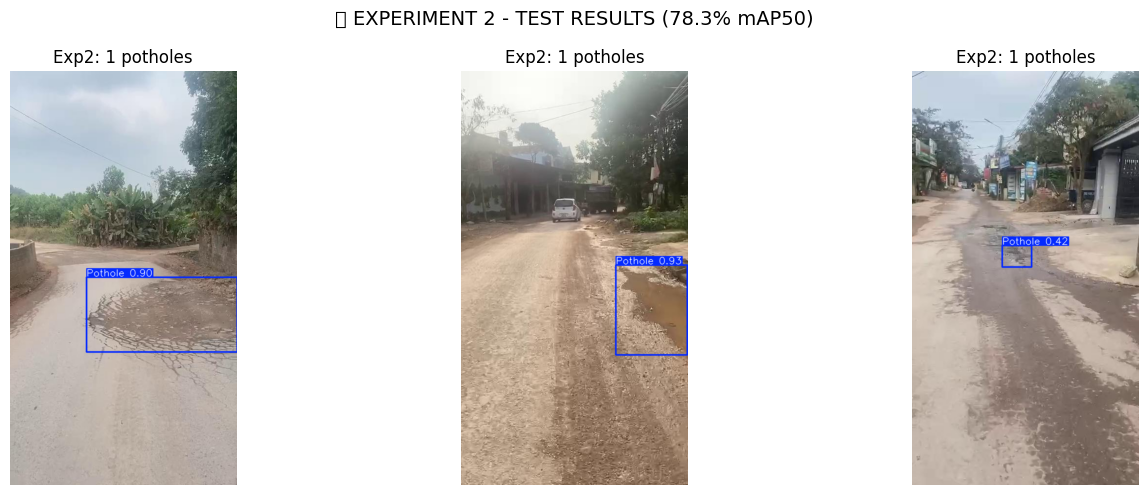

In [19]:
# Experiment 2 model test karo
model_exp2 = YOLO('/content/runs/detect/experiment_2_yolov8s/weights/best.pt')

# Same images pe test karo
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, img_name in enumerate(test_images):
    img_path = f"{val_images}/{img_name}"

    # Predict
    results = model_exp2(img_path)[0]
    img_with_boxes = results.plot()
    img_with_boxes = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

    axes[i].imshow(img_with_boxes)
    axes[i].axis('off')
    axes[i].set_title(f'Exp2: {len(results.boxes)} potholes')

plt.suptitle('📊 EXPERIMENT 2 - TEST RESULTS (78.3% mAP50)', fontsize=14)
plt.tight_layout()
plt.show()

compare both model


image 1/1 /content/Pothole-1/valid/images/scene00061_png.rf.6c837261e60386fd0999b5b393430839.jpg: 832x480 1 Pothole, 13.2ms
Speed: 4.2ms preprocess, 13.2ms inference, 2.0ms postprocess per image at shape (1, 3, 832, 480)

image 1/1 /content/Pothole-1/valid/images/scene00061_png.rf.6c837261e60386fd0999b5b393430839.jpg: 832x480 1 Pothole, 23.3ms
Speed: 10.2ms preprocess, 23.3ms inference, 5.7ms postprocess per image at shape (1, 3, 832, 480)

image 1/1 /content/Pothole-1/valid/images/scene13-34-_png.rf.82be1ec97ab088037c282544c58196e0.jpg: 832x480 1 Pothole, 29.8ms
Speed: 9.1ms preprocess, 29.8ms inference, 4.4ms postprocess per image at shape (1, 3, 832, 480)

image 1/1 /content/Pothole-1/valid/images/scene13-34-_png.rf.82be1ec97ab088037c282544c58196e0.jpg: 832x480 1 Pothole, 24.5ms
Speed: 11.8ms preprocess, 24.5ms inference, 2.5ms postprocess per image at shape (1, 3, 832, 480)

image 1/1 /content/Pothole-1/valid/images/scene2-33-_png.rf.7ed8768218054505168ae3d189c2dbb0.jpg: 832x480 1

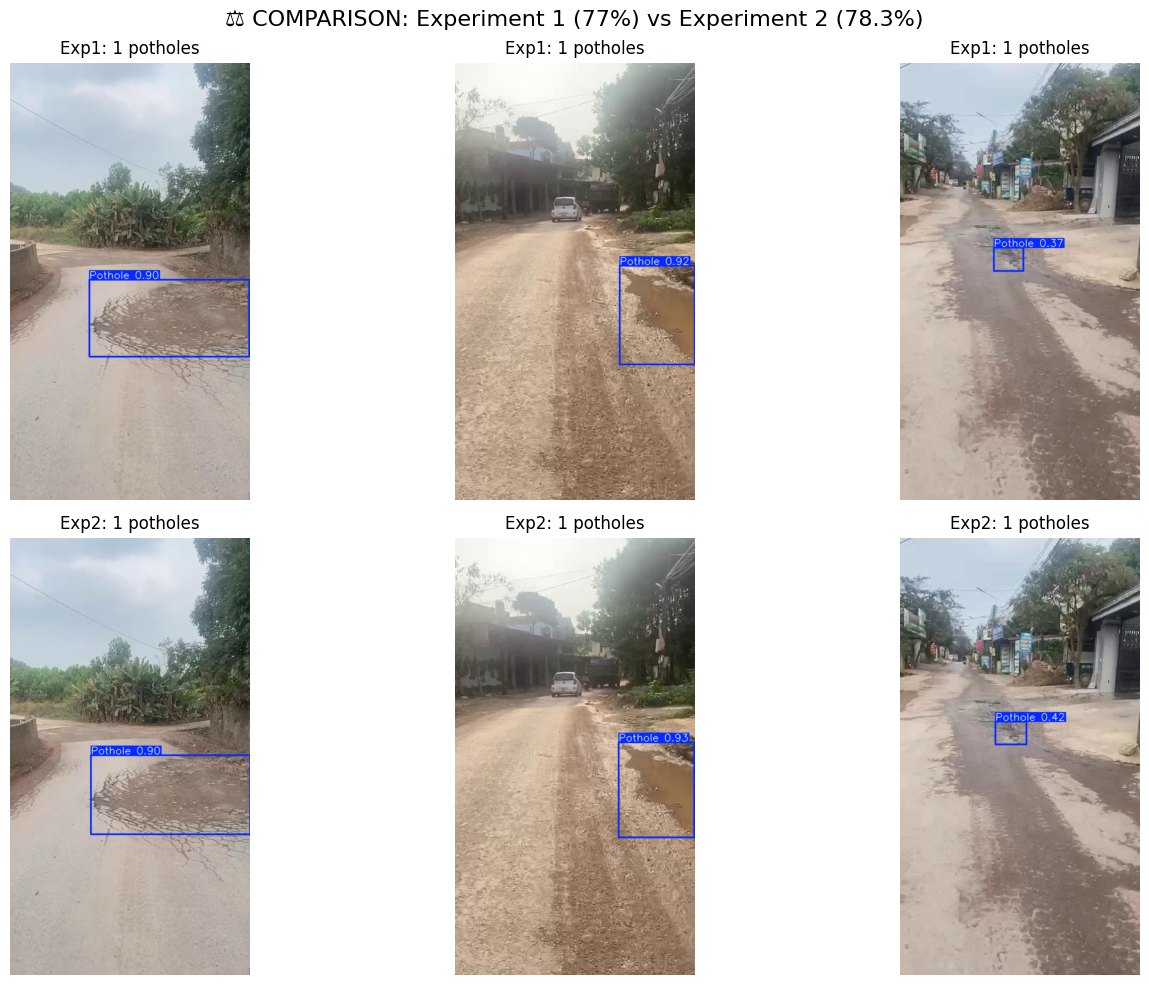

In [20]:
# Side by side comparison
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, img_name in enumerate(test_images[:3]):
    img_path = f"{val_images}/{img_name}"

    # Exp 1
    results1 = model_exp1(img_path)[0]
    img1 = cv2.cvtColor(results1.plot(), cv2.COLOR_BGR2RGB)
    axes[0, i].imshow(img1)
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Exp1: {len(results1.boxes)} potholes')

    # Exp 2
    results2 = model_exp2(img_path)[0]
    img2 = cv2.cvtColor(results2.plot(), cv2.COLOR_BGR2RGB)
    axes[1, i].imshow(img2)
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Exp2: {len(results2.boxes)} potholes')

plt.suptitle('⚖️ COMPARISON: Experiment 1 (77%) vs Experiment 2 (78.3%)', fontsize=16)
plt.tight_layout()
plt.show()

downlaod both model

In [21]:
# DONO MODELS EK SAATH DOWNLOAD KARO
from google.colab import files
import os

# Experiment 1 model
exp1_path = '/content/runs/detect/experiment_1_50ep_832/weights/best.pt'
files.download(exp1_path)
print("✅ Experiment 1 model downloaded!")

# Experiment 2 model
exp2_path = '/content/runs/detect/experiment_2_yolov8s/weights/best.pt'
files.download(exp2_path)
print("✅ Experiment 2 model downloaded!")

print("\n🎯 DONO MODELS PC MEIN SAVE HO GAYE!")
print("📁 Check your Downloads folder")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Experiment 1 model downloaded!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Experiment 2 model downloaded!

🎯 DONO MODELS PC MEIN SAVE HO GAYE!
📁 Check your Downloads folder
